<a href="https://colab.research.google.com/github/g-Sophia-ly/Forecasting-Sales/blob/main/Prediction_CarPrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
# %matplotlib inline
# mpl.style.use('ggplot')

In [4]:
car = pd.read_csv('/content/car_price.csv')
car.head(10)

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel
5,Ford EcoSport Titanium 1.5L TDCi,Ford,2015,Ask For Price,"59,000 kms",Diesel
6,Ford Figo,Ford,2012,"1,75,000","41,000 kms",Diesel
7,Hyundai Eon,Hyundai,2013,"1,90,000","25,000 kms",Petrol
8,Ford EcoSport Ambiente 1.5L TDCi,Ford,2016,"8,30,000","24,530 kms",Diesel
9,Maruti Suzuki Alto K10 VXi AMT,Maruti,2015,"2,50,000","60,000 kms",Petrol


In [5]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [7]:
car.shape

(892, 6)

In [8]:
backup = car.copy()

## Cleaning Data

In [10]:
car = car[car['year'].str.isnumeric()]
car['yaer'] = car['year'].astype(int)

In [12]:
car = car[car['Price'] != 'Ask For Price']
car['Price'] = car['Price'].str.replace(',', '').astype(int)

In [13]:
car['kms_driven'] = car['kms_driven'].str.split(' ').str.get(0).str.replace(',', '')
car = car[car['kms_driven'].str.isnumeric()]
car['kms_driven'] = car['kms_driven'].astype(int)

In [14]:
car = car[~car['fuel_type'].isna()]
car.shape

(816, 7)

In [15]:
car.head()

,name,company,year,Price,kms_driven,fuel_type,yaer
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000,45000,Petrol,2007
1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000,40,Diesel,2006
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000,28000,Petrol,2014
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,575000,36000,Diesel,2014
6,Ford Figo,Ford,2012,175000,41000,Diesel,2012


In [16]:
car['name'] = car['name'].str.split(' ').str.slice(0, 3).str.join(' ')
car = car.reset_index(drop=True)
car.head()

,name,company,year,Price,kms_driven,fuel_type,yaer
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol,2007
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel,2006
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol,2014
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel,2014
4,Ford Figo,Ford,2012,175000,41000,Diesel,2012


In [17]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    object
 3   Price       816 non-null    int64 
 4   kms_driven  816 non-null    int64 
 5   fuel_type   816 non-null    object
 6   yaer        816 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 44.8+ KB


In [19]:
car.describe(include='all')

,name,company,year,Price,kms_driven,fuel_type,yaer
count,816,816,816,8.160000e+02,816.000000,816,816.000000
unique,254,25,21,NaN,NaN,3,NaN
top,Maruti Suzuki Swift,Maruti,2015,NaN,NaN,Petrol,NaN
freq,51,221,111,NaN,NaN,428,NaN
mean,NaN,NaN,NaN,4.117176e+05,46275.531863,NaN,2012.444853
std,NaN,NaN,NaN,4.751844e+05,34297.428044,NaN,4.002992
min,NaN,NaN,NaN,3.000000e+04,0.000000,NaN,1995.000000
25%,NaN,NaN,NaN,1.750000e+05,27000.000000,NaN,2010.000000
50%,NaN,NaN,NaN,2.999990e+05,41000.000000,NaN,2013.000000
75%,NaN,NaN,NaN,4.912500e+05,56818.500000,NaN,2015.000000


In [20]:
mean = car['Price'].mean()
std = car['Price'].std()

z_scores = (car['Price'] - mean) / std
car_clean = car[np.abs(z_scores) < 3]
car_clean.shape

(798, 7)

In [21]:
car = car_clean.copy()

- Relationship of company with price

In [22]:
car['company'].unique()

array(['Hyundai', 'Mahindra', 'Ford', 'Maruti', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'Chevrolet', 'BMW', 'Nissan', 'Hindustan', 'Fiat', 'Force',
       'Mercedes', 'Jeep'], dtype=object)

In [23]:
import seaborn as sns

/tmp/ipython-input-1539686891.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='company', y='Price', data=car, palette='viridis') # Added palette='viridis'
/tmp/ipython-input-1539686891.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')


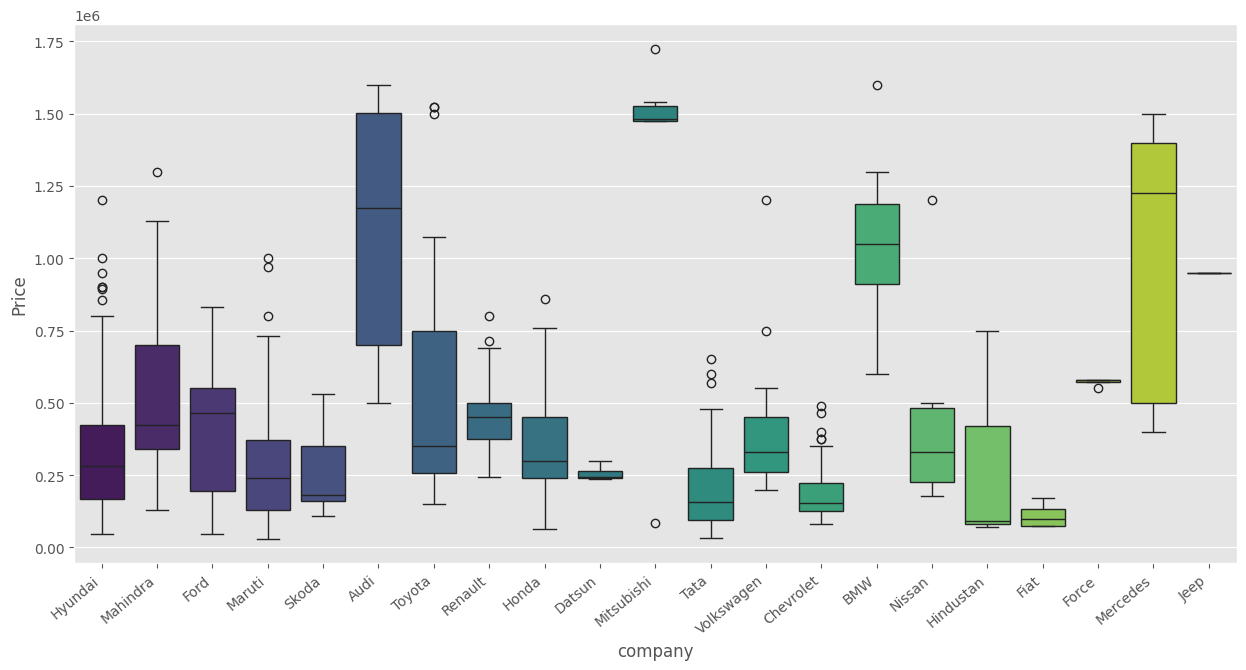

In [25]:
plt.subplots(figsize=(15, 7))
ax = sns.boxplot(x='company', y='Price', data=car, palette='viridis') # Added palette='viridis'
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
plt.show()

- Relationship of year with price

/tmp/ipython-input-1895067374.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.swarmplot(x='year', y='Price', data=car, palette='viridis')
/tmp/ipython-input-1895067374.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')


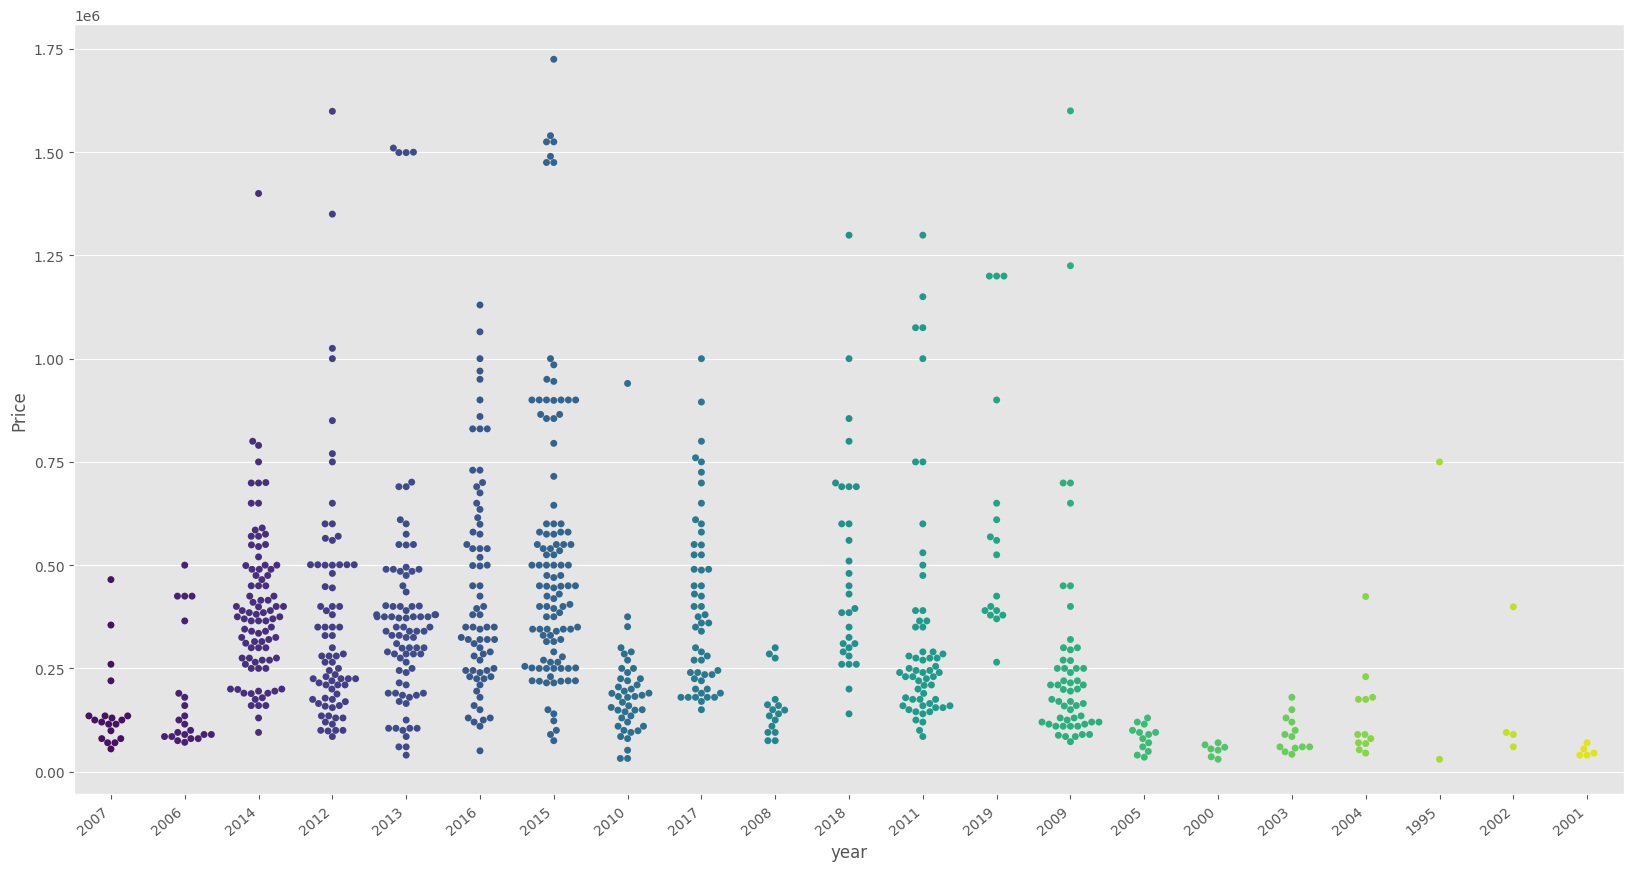

In [26]:
plt.subplots(figsize=(20, 10))
ax = sns.swarmplot(x='year', y='Price', data=car, palette='viridis')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
plt.show()

- Relationship of kms_driven with price

/tmp/ipython-input-2476384676.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.relplot(x='kms_driven', y='Price', data=car, height=7, aspect=1.5, palette='viridis')


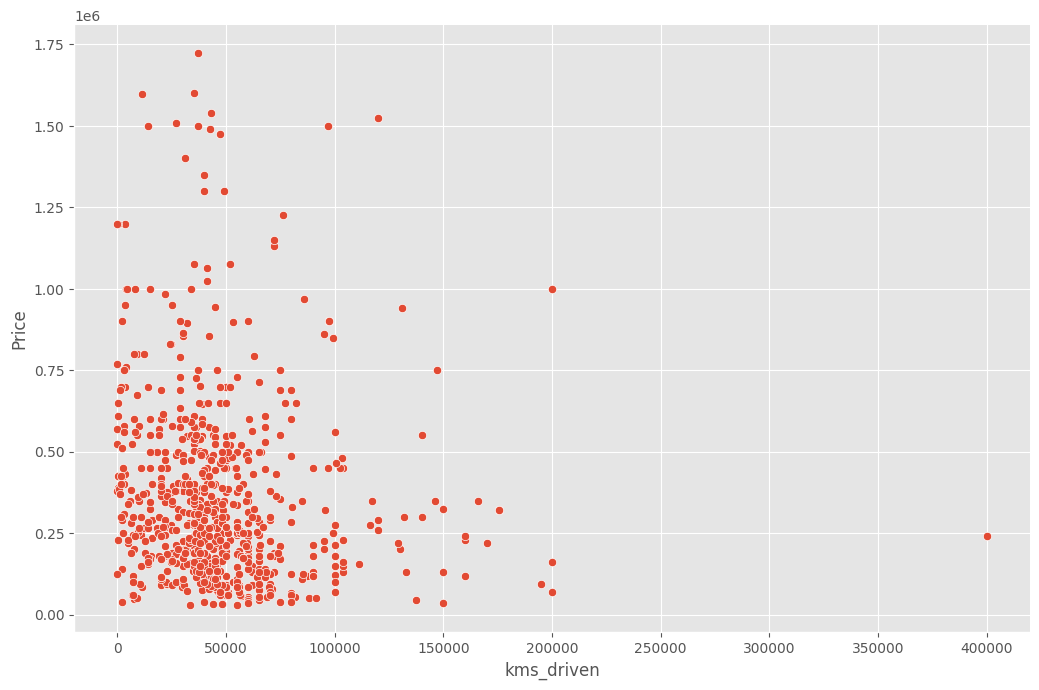

In [27]:
sns.relplot(x='kms_driven', y='Price', data=car, height=7, aspect=1.5, palette='viridis')

- Relationship of fuel type with price

/tmp/ipython-input-3172501869.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='fuel_type', y='Price', data=car, palette='viridis')


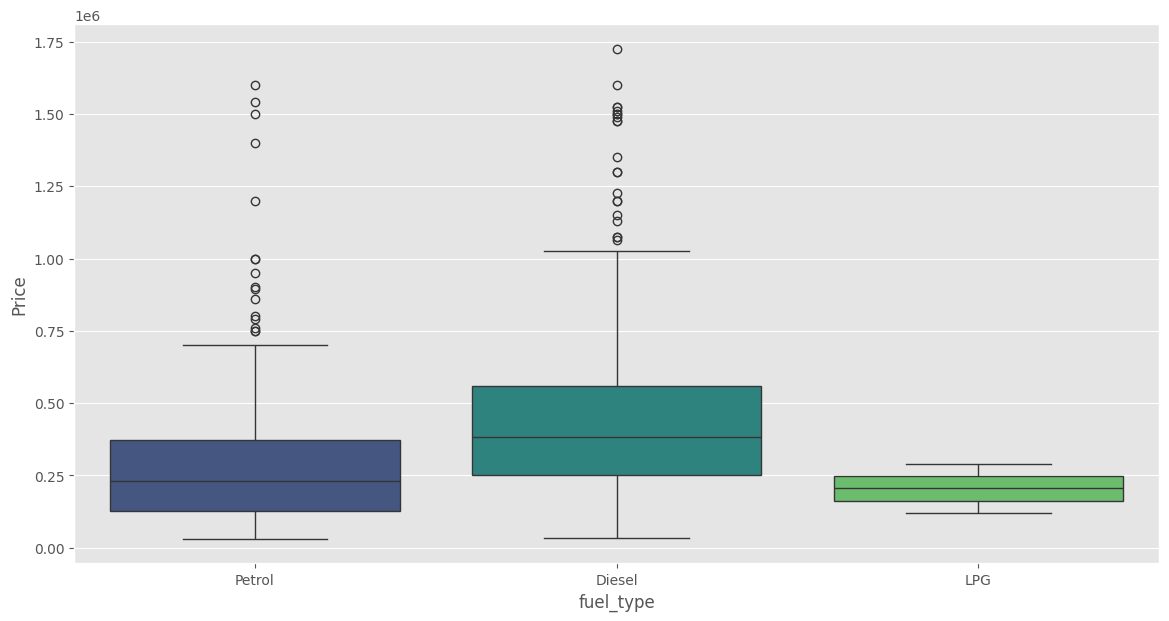

In [28]:
plt.subplots(figsize=(14, 7))
ax = sns.boxplot(x='fuel_type', y='Price', data=car, palette='viridis')

- Relationship of price with fuel type, year and company mixed

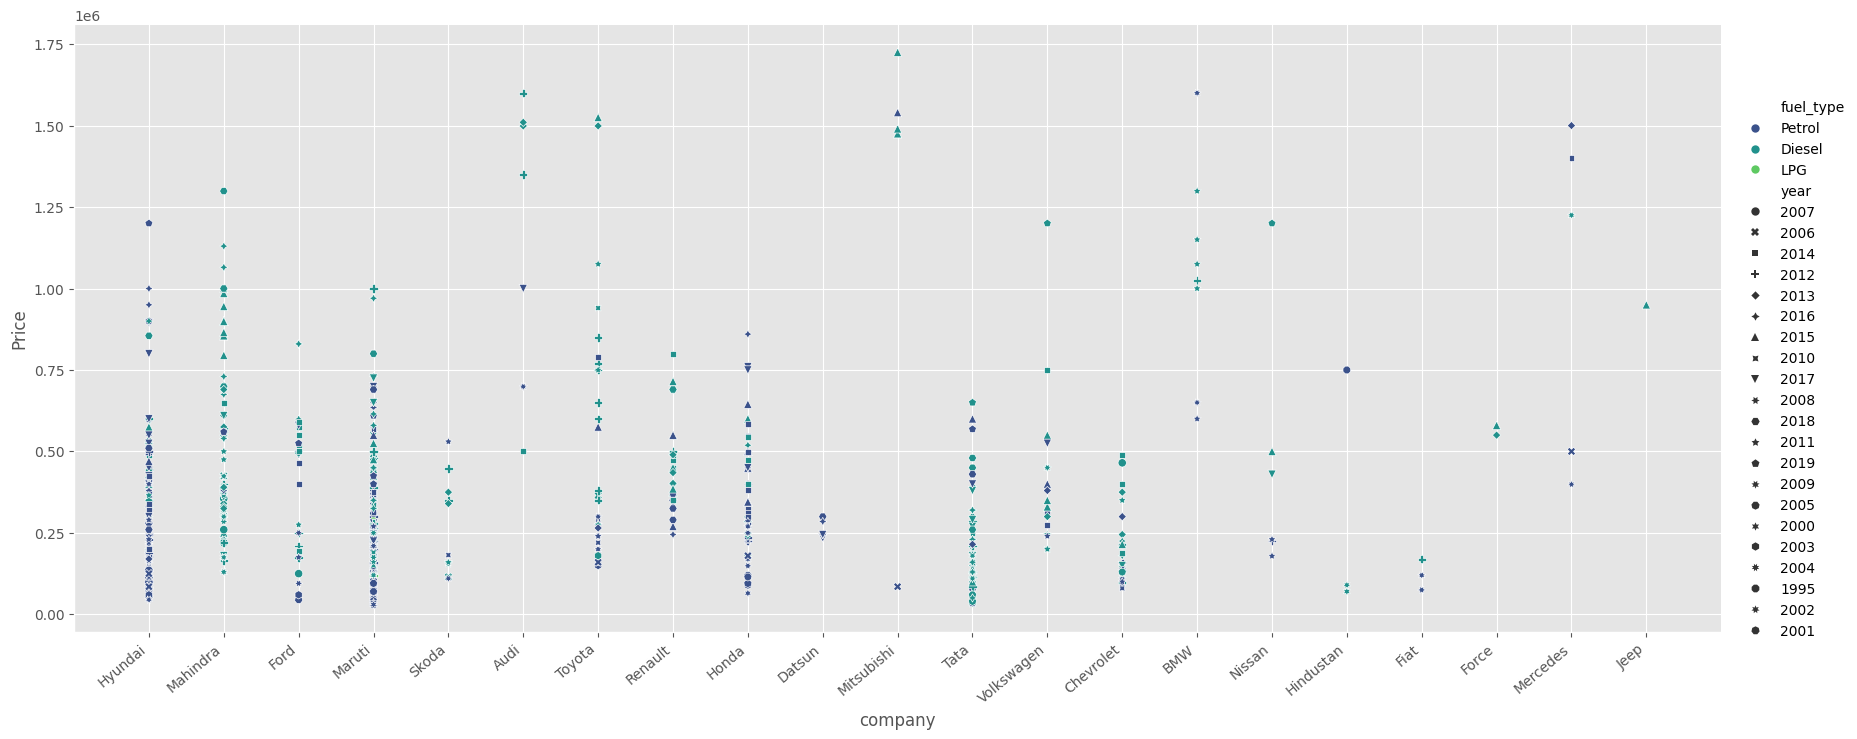

In [30]:
ax = sns.relplot(x='company', y='Price', data=car, height=7, aspect=2.5, palette='viridis', hue='fuel_type', style='year')
ax.set_xticklabels(rotation=40, ha='right')

Spiliting Training Data

In [31]:
X = car[['name', 'company', 'year', 'kms_driven', 'fuel_type']]
y = car['Price']

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

## Linear Regression

In [34]:
ohe  = OneHotEncoder()
ohe.fit(X[['name', 'company', 'fuel_type']])

OneHotEncoder()

In [36]:
column_trans = make_column_transformer((OneHotEncoder(categories=ohe.categories_), ['name', 'company', 'fuel_type']),
                                       remainder='passthrough')

In [38]:
lr = LinearRegression()
pipe = make_pipeline(column_trans, lr)
pipe.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0', 'Audi A8',
       'Audi Q3 2.0', 'Audi Q7', 'BMW 3 Series', 'BMW 5 Series',
       'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d', 'BMW X1 xDrive20d',
       'Chevrolet Beat', 'Chevrolet Beat Diesel', 'Chevrolet Beat LS',
       'Che...
       'Volkswagen Vento Konekt'], dtype=object),
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jeep', 'Mahindra', 'Maruti',
       'Mercedes', 'Mitsubishi', 'Nissan', 'Renault', 'Skoda', 'Tata',
       'Toyota', 'Volkswagen'], dtype=object),
                                                                            array(['Diesel', 'LPG', 'Petrol'], dtype=object)]),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('linearregression', LinearRegression())])

In [39]:
y_pred = pipe.predict(X_test)

In [40]:
r2_score(y_test, y_pred)

0.6424187856882089

In [46]:
scores = []
for i in range(5000):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=i)
  lr = LinearRegression()
  pipe = make_pipeline(column_trans, lr)
  pipe.fit(X_train, y_train)
  y_pred = pipe.predict(X_test)
  scores.append(r2_score(y_test, y_pred))

In [47]:
np.argmax(scores)

np.int64(4798)

In [48]:
scores[np.argmax(scores)]

0.8601277418000699

## the best model is found at a certain random state

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=np.argmax(scores))
lr = LinearRegression()
pipe = make_pipeline(column_trans, lr)
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
r2_score(y_test, y_pred)

0.8601277418000699

In [51]:
import pickle
pickle.dump(pipe, open('LinearRegressionModel.pkl', 'wb'))
pipe.predict(pd.DataFrame([['Maruti Suzuki Swift', 'Maruti', 2019, 100, 'Petrol']], columns=['name', 'company', 'year', 'kms_driven', 'fuel_type']))

array([410691.45479672])